In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import time

start_time = time.time()

In [22]:
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")

np.set_printoptions(precision=4, threshold=10000, linewidth=100, edgeitems=999, suppress=True)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 10)
pd.set_option('expand_frame_repr', False)
pd.set_option('precision', 6)

%matplotlib inline

pd.set_option('display.max_columns', 100)

# Styles
sns.set_context('poster')
sns.set_style('darkgrid')
sns.set_palette("Paired")

plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['text.color'] = 'k'

font = {'size'   : 10}

plt.rc('font', **font)


In [23]:
train_store = pd.read_pickle("../data/1_train_store_preprocessed.pkl").sort_values(['Store','Date'])
test_store = pd.read_pickle("../data/1_test_store_preprocessed.pkl").sort_values(['Store','Date'])

In [24]:
train_store.head()

,Store,DayOfWeek,Date,Year,Month,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1016095,1,2,2013-01-01,2013,1,0,0,0,1,0,0,0.0,0.0,1270.0,3.0,7.0,0.0,0.0,0.0,0.0
1014980,1,3,2013-01-02,2013,1,668,1,0,0,0,5530,0.0,0.0,1270.0,3.0,7.0,0.0,0.0,0.0,0.0
1013865,1,4,2013-01-03,2013,1,578,1,0,0,0,4327,0.0,0.0,1270.0,3.0,7.0,0.0,0.0,0.0,0.0
1012750,1,5,2013-01-04,2013,1,619,1,0,0,0,4486,0.0,0.0,1270.0,3.0,7.0,0.0,0.0,0.0,0.0
1011635,1,6,2013-01-05,2013,1,635,1,0,0,0,4997,0.0,0.0,1270.0,3.0,7.0,0.0,0.0,0.0,0.0


In [25]:
train_store[train_store['Store']==112].head()

,Store,DayOfWeek,Date,Year,Month,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1016206,112,2,2013-01-01,2013,1,0,0,0,1,0,0,1.0,0.0,1630.0,3.0,6.0,0.0,0.0,0.0,0.0
1015091,112,3,2013-01-02,2013,1,877,1,0,0,0,6612,1.0,0.0,1630.0,3.0,6.0,0.0,0.0,0.0,0.0
1013976,112,4,2013-01-03,2013,1,748,1,0,0,0,5705,1.0,0.0,1630.0,3.0,6.0,0.0,0.0,0.0,0.0
1012861,112,5,2013-01-04,2013,1,773,1,0,0,0,5845,1.0,0.0,1630.0,3.0,6.0,0.0,0.0,0.0,0.0
1011746,112,6,2013-01-05,2013,1,759,1,0,0,1,6195,1.0,0.0,1630.0,3.0,6.0,0.0,0.0,0.0,0.0


In [26]:
train_sales = train_store.set_index(['Store','Date'])['Sales']

In [27]:
N=112
train_sales_store_N = train_store[train_store['Store']==N].set_index('Date')['Sales']
train_sales_store_N.head()

Date
2013-01-01       0
2013-01-02    6612
2013-01-03    5705
2013-01-04    5845
2013-01-05    6195
Name: Sales, dtype: int64

<AxesSubplot:xlabel='Date'>

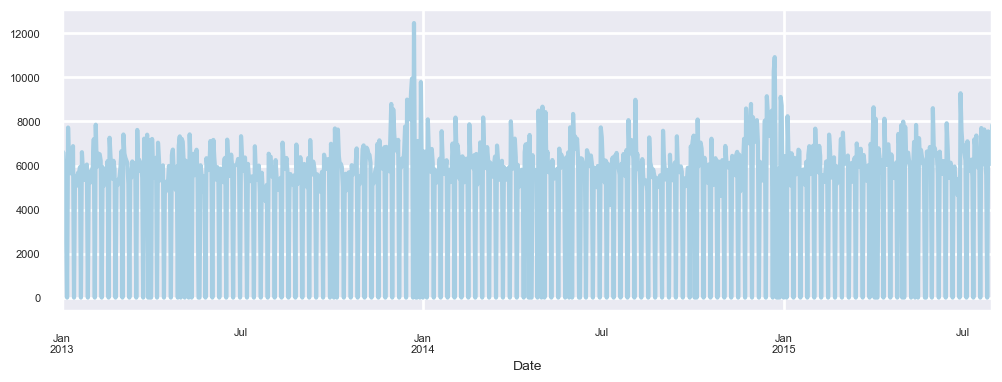

In [28]:
train_sales_store_N.plot()

In [29]:
y = train_sales_store_N.resample('MS').sum()
y.plot()

ImportError: cannot import name 'ShallowMixin' from 'pandas.core.base' (C:\Users\Faolin\anaconda3\lib\site-packages\pandas\core\base.py)

In [ ]:
y = train_sales_store_N.resample('W').sum()
y.plot()